# IC Data Visualization with Python

## This notebook contains the following topics:
### 01. Importing libraries and files
### 02. Creating Bar Charts for 'order_day_of_week'
### 03. Creating Histograms and Scatterplots for 'prices'
### 04. Creating Line Chart of 'prices'/ against 'order_day_of_week' on Sample of Dataframe
### 05. Descriptive findings about sales
### 06. Distribution of orders among customers in terms of loyalty
### 07. Checking to see whether there is a difference in prices depending on the hour of day
### 08. Connection between Age and Family Situation
### 09. Connection between Age and income

# 01. Importing libraries and files

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create folder path
path = r'C:\Users\olufunsoo\Desktop\CareerFoundry Documents'

In [3]:
# Import file customers_orders_products.pkl as df_cop
df_cop = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_orders_products.pkl'))

# 02. Creating Bar Charts for 'order_day_of_week'

<Axes: xlabel='order_day_of_week'>

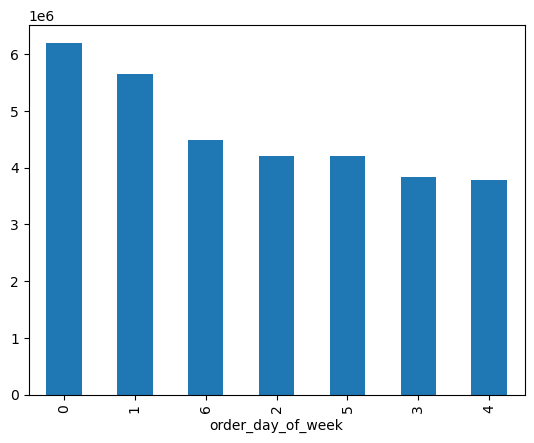

In [5]:
# Create bar chart
df_cop['order_day_of_week'].value_counts().plot.bar()

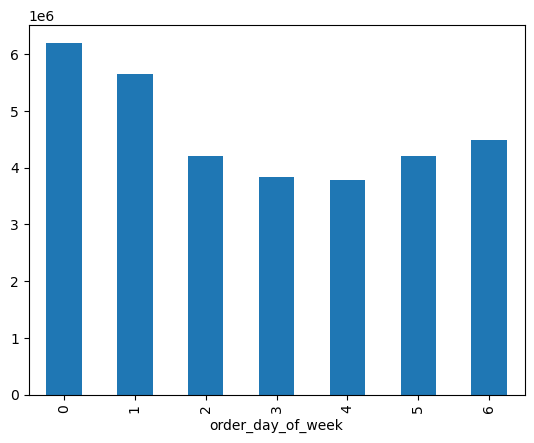

In [6]:
# Create bar chart with index sorted
bar = df_cop['order_day_of_week'].value_counts().sort_index().plot.bar()

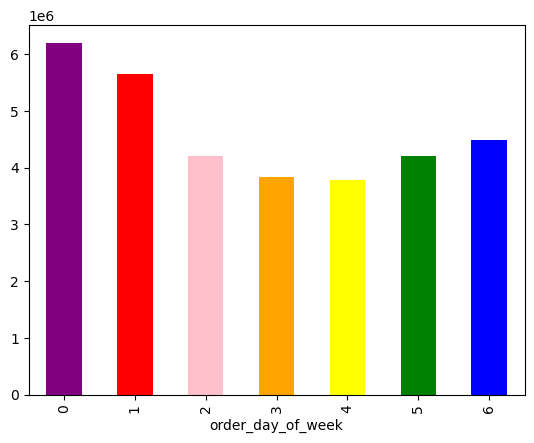

In [7]:
# Create bar chart with index sorted and colored bars
bar_1 = df_cop['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

## Exporting bar charts

In [8]:
# Exporting bar as bar_orders_dow.png
bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

In [9]:
# Exporting bar_1 as bar1_orders_dow.png
bar_1.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar1_orders_dow.png'))

# 03. Creating Histograms and Scatterplots for 'prices'

## Scatterplots for 'prices'

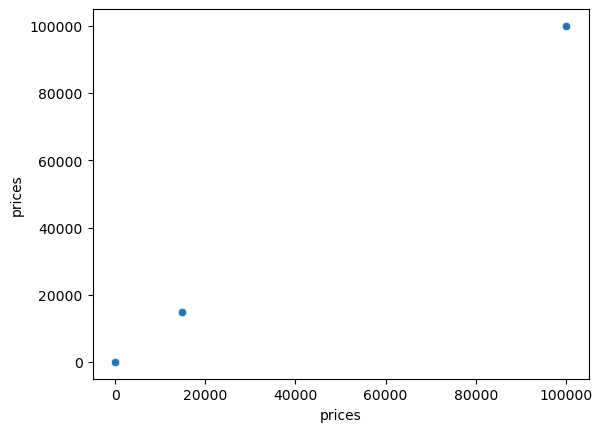

In [15]:
# Creating scatterplot for 'prices'
sns.scatterplot (x = 'prices', y = 'prices', data = df_cop)

In [16]:
df_cop['prices']. describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

### Removing outliers in dataframe (prices above 100) in order to create histogram

In [17]:
# Checking for the outliers
df_cop.loc[df_cop['prices'] > 100]

,user_id,First Name,Surname,Gender,STATE,Age,date_joined,number_of_dependants,family_status,income,...,prices,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_prior_order,order_frequency_flag,_merge
5547,117740,Lisa,Sparks,Female,Oregon,55,1/1/2017,1,married,292759,...,14900.0,Busiest day 2,Most orders,84,Loyal customer,36.928431,Higher spender,4.0,Frequent customer,both
10303,31590,Beverly,Sanford,Female,Montana,46,1/1/2017,0,single,154076,...,14900.0,Busiest day 2,Average orders,38,Regular customer,58.139865,Higher spender,8.0,Frequent customer,both
27945,100958,Benjamin,Parsons,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,...,14900.0,Regularly busy,Average orders,5,New customer,627.991667,Higher spender,11.0,Regular customer,both
27946,100958,Benjamin,Parsons,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,...,14900.0,Busiest day 1,Most orders,5,New customer,627.991667,Higher spender,11.0,Regular customer,both
27947,100958,Benjamin,Parsons,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,...,14900.0,Busiest day 1,Most orders,5,New customer,627.991667,Higher spender,11.0,Regular customer,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32390922,5519,Kathy,Daniel,Female,Georgia,78,4/1/2020,3,married,262610,...,14900.0,Least busy 2,Most orders,53,Loyal customer,69.638604,Higher spender,7.0,Frequent customer,both
32390923,5519,Kathy,Daniel,Female,Georgia,78,4/1/2020,3,married,262610,...,14900.0,Regularly busy,Average orders,53,Loyal customer,69.638604,Higher spender,7.0,Frequent customer,both
32390924,5519,Kathy,Daniel,Female,Georgia,78,4/1/2020,3,married,262610,...,14900.0,Regularly busy,Most orders,53,Loyal customer,69.638604,Higher spender,7.0,Frequent customer,both
32396990,140589,Clarence,Harper,Male,Maryland,26,4/1/2020,0,single,154845,...,99999.0,Regularly busy,Average orders,9,New customer,876.974783,Higher spender,20.0,Regular customer,both


In [6]:
# Turning the outliers to missing values
df_cop.loc[df_cop['prices'] > 100, 'prices'] = np.nan

In [7]:
# Checking for output (max price)
df_cop['prices'].max()

25.0

## Histogram for 'prices'

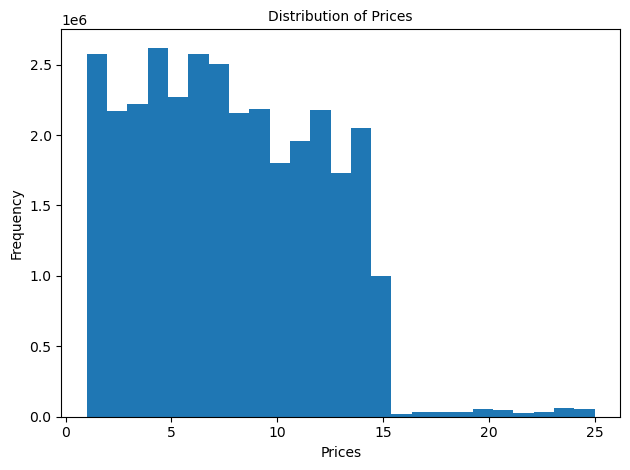

In [8]:
# Create histogram for 'prices'
hist = df_cop['prices'].plot.hist(bins = 25)
plt.title ('Distribution of Prices', fontsize = 10)
plt.xlabel ('Prices')
plt.tight_layout()

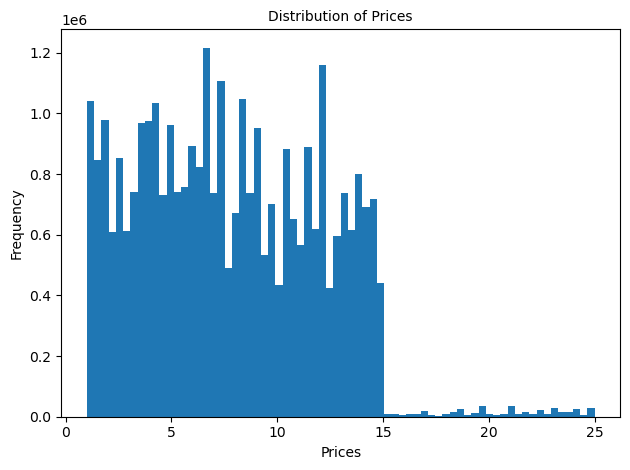

In [9]:
# Increasing the level of granularity in the histogram
hist_2 = df_cop['prices'].plot.hist(bins = 70)
plt.title ('Distribution of Prices', fontsize = 10)
plt.xlabel ('Prices')
plt.tight_layout()

## Exporting Histograms

In [10]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

In [11]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_2_prices.png'))

# 04. Creating Line Chart of 'prices'/ against 'order_day_of_week' on Sample of Dataframe

## Sampling Data

In [25]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_cop)) <= 0.7

In [26]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [27]:
# Store 70% of the sample in the dataframe big

big = df_cop[dev]

In [28]:
# Store 30% of the sample in the dataframe small

small = df_cop[~dev]

#### To confirm output of sampling

In [29]:
len(df_cop)

32404859

In [30]:
len (big) + len (small)

32404859

#### Reducing sample to only the columns necessary for the line chart

In [31]:
df_2 = small[['order_day_of_week', 'prices']]

## Creating line chart on subsample df_2

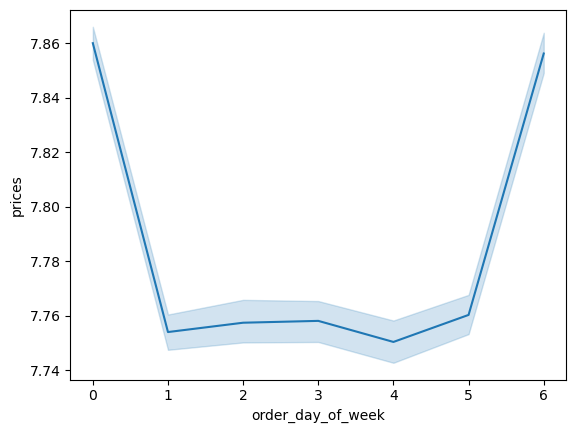

In [50]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')

## Exporting line chart

In [34]:
# Export line as 'line_prices_dow.png'
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_dow.png'))

# 05. Descriptive findings about sales

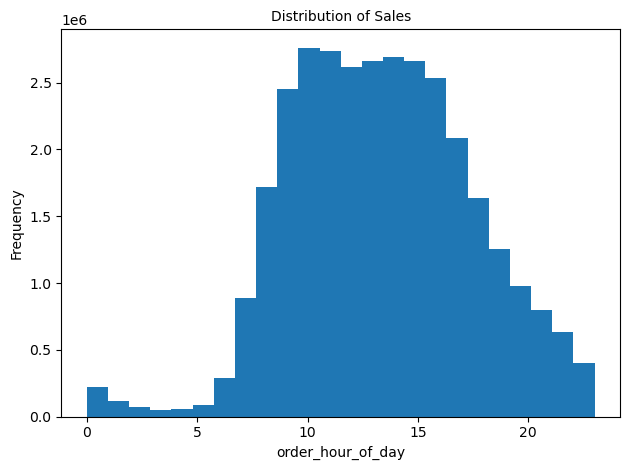

In [12]:
# Create histogram of the'order_hour_of_day' column
sales_hist = df_cop['order_hour_of_day'].plot.hist(bins = 24)
plt.title ('Distribution of Sales', fontsize = 10)
plt.xlabel ('order_hour_of_day')
plt.tight_layout()

### The chart above shows that most orders are made between 9am and 4pm, with 10am having the highest orders. Orders made in the early hours of the day, between 12am and 5am, are considerably low. However, the orders begin to increasingly come in from 6am to the period when there are most orders (9am and 4pm). From 4pm, the orders begin to decline. Worthy of note is that the highest number of orders come in by 10am and the lowest number of orders come in by 3am.

In [13]:
# Exporting histogram 'sales_hist' as 'sales_hist_hod.png'
sales_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','sales_hist_hod.png'))

# 06. Distribution of orders among customers in terms of loyalty

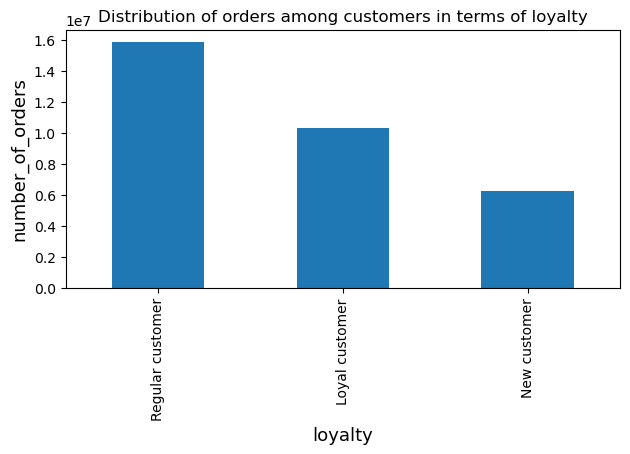

In [14]:
# Create bar chart from 'loyalty_flag' column
loyal_bar = df_cop['loyalty_flag'].value_counts().plot.bar()
plt.xlabel('loyalty', fontsize = 13)
plt.ylabel('number_of_orders', fontsize = 13)
plt.title('Distribution of orders among customers in terms of loyalty')
plt.tight_layout()

### Although the maximum number of orders are made by loyal customer, majoirity of the orders are made by regular customers

## Exporting bar chart

In [15]:
# Export 'loyal_bar' as 'loyal_bar.png'
loyal_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_bar.png'))

# 07. Checking to see whether there is a difference in prices depending on the hour of day

## Using same sample created for line chart above

In [49]:
# Creating subset having only necessary columns
df_3 = small[['order_hour_of_day', 'prices']]

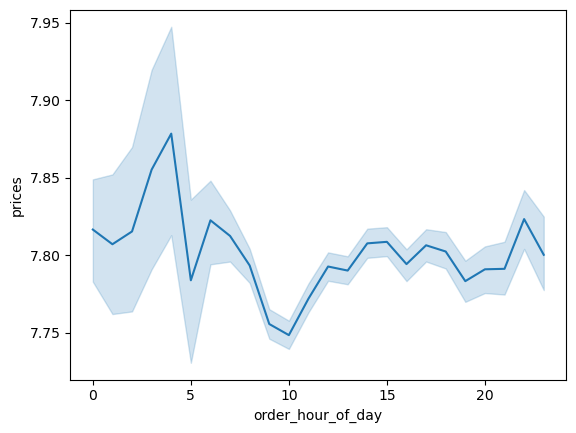

In [52]:
# Create line chart
line_hod = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

### There are differences in the expenses depending on the hour of day. However, it is notable that between 3pm and 8pm, the differences are not so much, as compared to the differences in the early hours of the day.

## Exporting line chart

In [53]:
# Export 'line_hod' as 'line_hod.png'
line_hod.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hod.png'))

# 08. Connection between Age and Family Situation

In [56]:
# Create subset for necessary columns 'Age' and 'number_of_dependants' with the sample of df_cop
df_4 = small[['Age', 'number_of_dependants']]

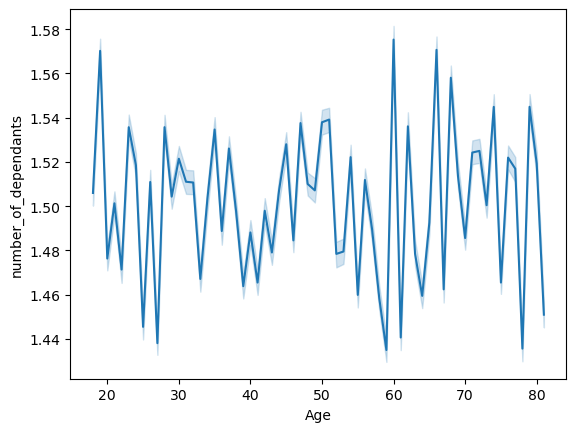

In [57]:
# Create a line chart exploring the connections between age and number of dependents
line_age_depend = sns.lineplot(data = df_4, x = 'Age', y = 'number_of_dependants')

## Exporting line chart

In [58]:
# Export line_age_depend as line_age_depend.png
line_age_depend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_depend.png'))

### The line graph depicts no relationship between age and number of dependents - a relationship cannot be defined from the line graph.

# 09. Connection between Age and income

In [59]:
# Creating subset for necessary columns 'Age' and 'income'
df_4 = small[['Age', 'income']]

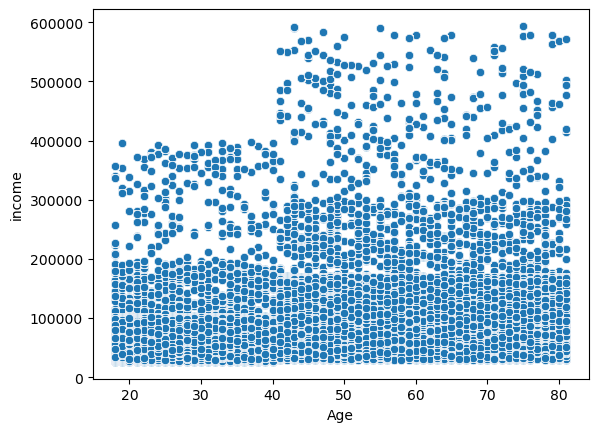

In [62]:
# Creating scatterplot for 'Age' and 'income'
scatterplot_age_income = sns.scatterplot (x = 'Age', y = 'income', data = df_4)

### The scatterplot depicts that there is no relationship between age and income.

## Exporting scatterplot

In [63]:
# Export scatterplot_age_income as scatterplot_age_income.png
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))